# SGD Classifier

Starting grid search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 1000}

Training Accuracy: 0.9511
Test Accuracy: 0.9489

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     16180
         1.0       0.82      0.61      0.70      1751

    accuracy                           0.95     17931
   macro avg       0.89      0.80      0.84     17931
weighted avg       0.95      0.95      0.95     17931



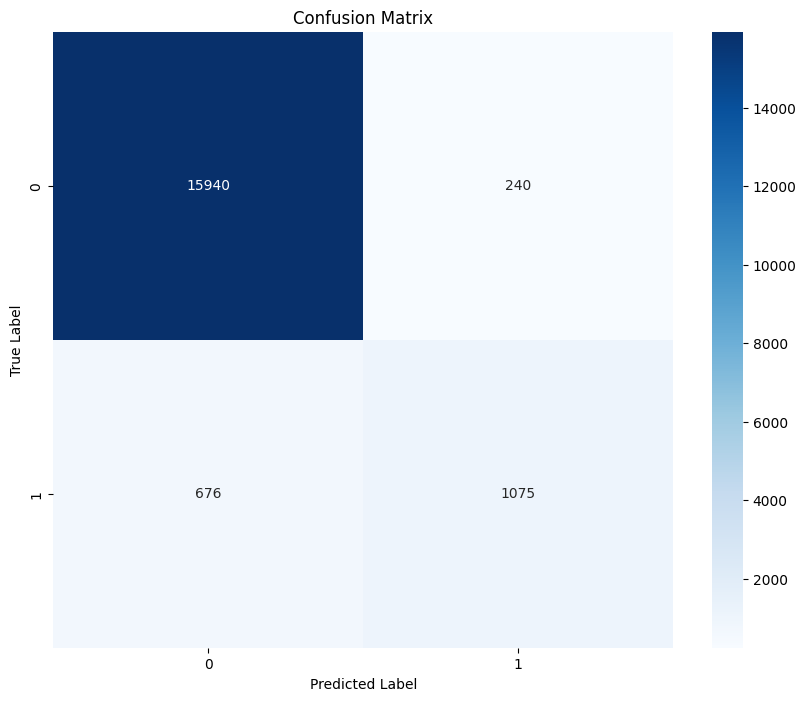

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Prepare data
X = df.drop('label', axis=1)
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid
param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000],
    'learning_rate': ['optimal', 'adaptive'],
    'eta0': [0.01, 0.1]
}

# Initialize GridSearchCV
model = SGDClassifier(random_state=42)
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=3,
    n_jobs=-1
)

# Fit the model
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)

# Get best model
best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# Save the model and scaler
model_data = {
    'model': best_model,
    'scaler': scaler,
    'best_params': grid_search.best_params_,
    'best_score': grid_search.best_score_
}
with open('sgd_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

# Get predictions
train_pred = best_model.predict(X_train_scaled)
test_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Print evaluation metrics
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, test_pred))

# Create and plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Function to load and use the model
def load_and_predict(model_path, X_new):
    """
    Load the saved model and make predictions on new data
    """
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)

    # Scale the input data
    X_scaled = model_data['scaler'].transform(X_new)

    # Make predictions
    predictions = model_data['model'].predict(X_scaled)
    probabilities = model_data['model'].predict_proba(X_scaled)

    return predictions, probabilities